In [119]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold


In [120]:
from sklearn.linear_model import LinearRegression



In [121]:
df=pd.read_csv('demopc.csv')
df

,Location,Area (sq ft),Bedrooms,Bathrooms,Age_of_Property (Years),Nearby_Schools,Nearby_Hospitals,Public_Transport_Access,Recent_Renovation,Selling_Price (USD)
0,Downtown,1500,3,2,5,3,2,Yes,No,300000
1,Suburban,2000,4,3,10,2,1,No,Yes,250000
2,Countryside,1800,3,2,15,1,1,No,No,200000
3,Downtown,1000,2,1,20,4,3,Yes,No,220000
4,Suburban,1200,2,2,3,3,2,Yes,Yes,280000
5,Countryside,2500,4,3,8,1,1,No,No,320000
6,Downtown,900,2,1,25,5,4,Yes,Yes,210000
7,Suburban,1100,2,1,2,2,2,No,No,230000
8,Countryside,1600,3,2,12,0,0,No,Yes,180000
9,Downtown,1400,3,2,7,4,3,Yes,No,290000


In [122]:
encoding = {'No': 0, 'Yes': 1}
df['Public_Transport_Access'] = df['Public_Transport_Access'].map(encoding)
df

,Location,Area (sq ft),Bedrooms,Bathrooms,Age_of_Property (Years),Nearby_Schools,Nearby_Hospitals,Public_Transport_Access,Recent_Renovation,Selling_Price (USD)
0,Downtown,1500,3,2,5,3,2,1,No,300000
1,Suburban,2000,4,3,10,2,1,0,Yes,250000
2,Countryside,1800,3,2,15,1,1,0,No,200000
3,Downtown,1000,2,1,20,4,3,1,No,220000
4,Suburban,1200,2,2,3,3,2,1,Yes,280000
5,Countryside,2500,4,3,8,1,1,0,No,320000
6,Downtown,900,2,1,25,5,4,1,Yes,210000
7,Suburban,1100,2,1,2,2,2,0,No,230000
8,Countryside,1600,3,2,12,0,0,0,Yes,180000
9,Downtown,1400,3,2,7,4,3,1,No,290000


In [123]:

df['Recent_Renovation'] = df['Recent_Renovation'].map(encoding)
df

,Location,Area (sq ft),Bedrooms,Bathrooms,Age_of_Property (Years),Nearby_Schools,Nearby_Hospitals,Public_Transport_Access,Recent_Renovation,Selling_Price (USD)
0,Downtown,1500,3,2,5,3,2,1,0,300000
1,Suburban,2000,4,3,10,2,1,0,1,250000
2,Countryside,1800,3,2,15,1,1,0,0,200000
3,Downtown,1000,2,1,20,4,3,1,0,220000
4,Suburban,1200,2,2,3,3,2,1,1,280000
5,Countryside,2500,4,3,8,1,1,0,0,320000
6,Downtown,900,2,1,25,5,4,1,1,210000
7,Suburban,1100,2,1,2,2,2,0,0,230000
8,Countryside,1600,3,2,12,0,0,0,1,180000
9,Downtown,1400,3,2,7,4,3,1,0,290000


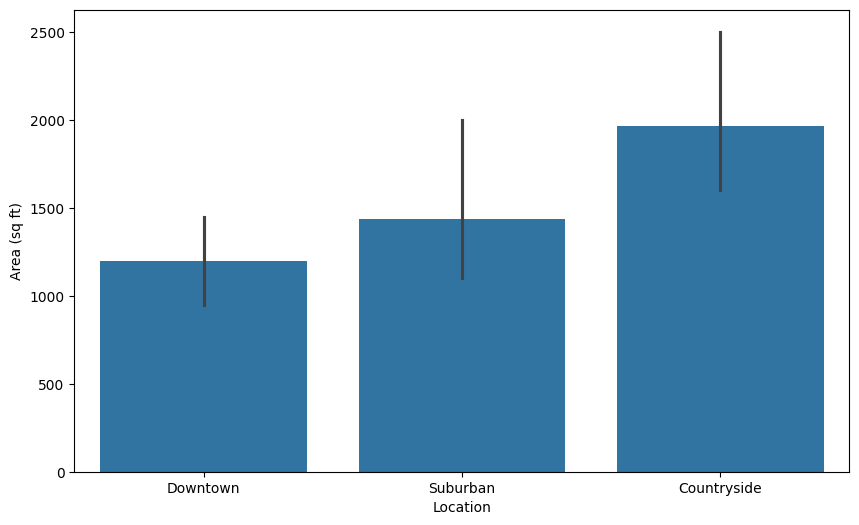

In [124]:
#It seems like the area factor definitely relies on Location of the property
# Downtown properties have least area while Countryside have 1600 and


plt.figure(figsize=(10,6))
sns.barplot(x='Location', y='Area (sq ft)', data=df)
plt.show()

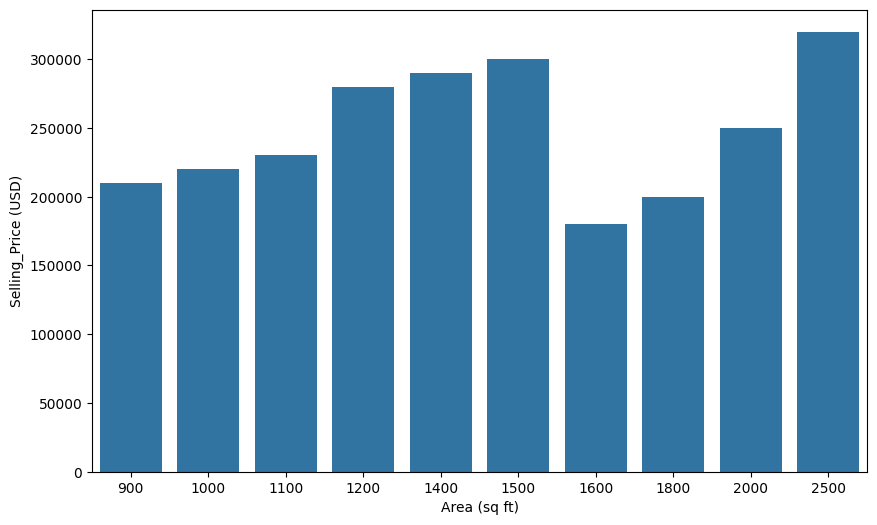

In [125]:
plt.figure(figsize=(10,6))
sns.barplot(x='Area (sq ft)', y='Selling_Price (USD)', data=df)
plt.show()
#But we can see area does not have a direct correlation to Selling Price therefore Location is not a key factor to decide Selling Price

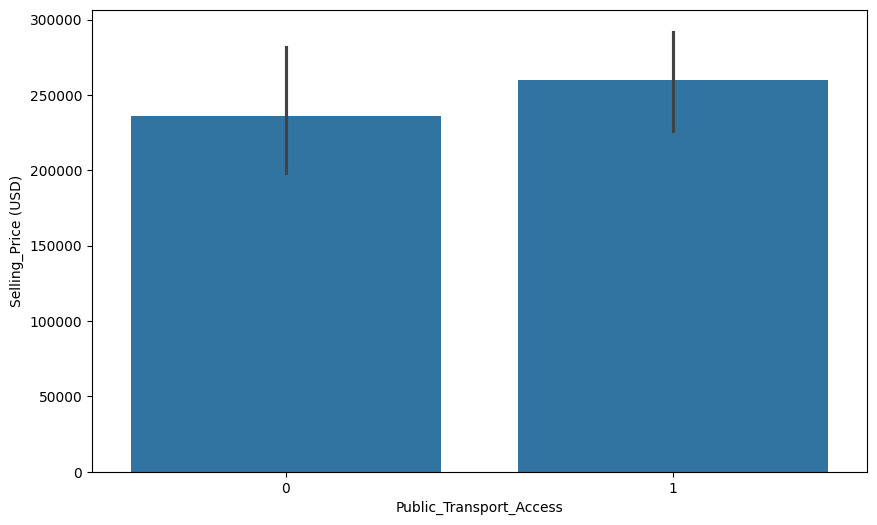

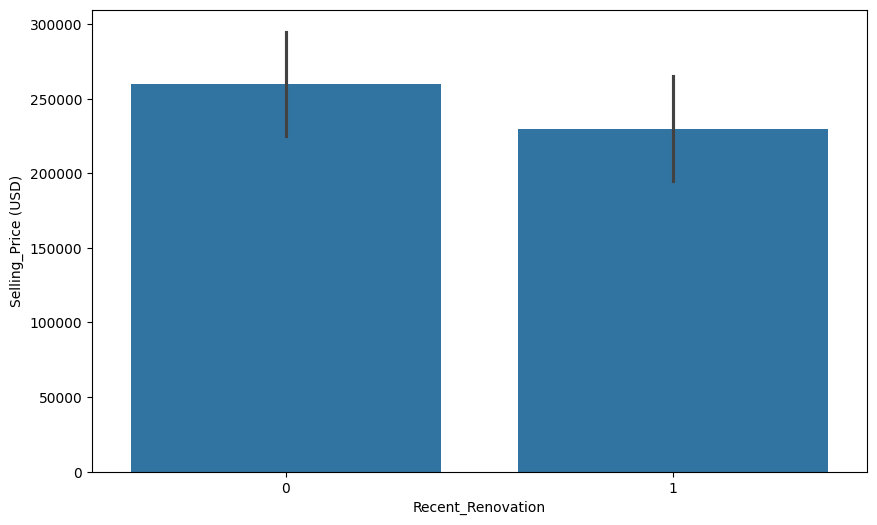

In [126]:
plt.figure(figsize=(10,6))
sns.barplot(x='Public_Transport_Access', y='Selling_Price (USD)', data=df)
plt.show()
plt.figure(figsize=(10,6))
sns.barplot(x='Recent_Renovation', y='Selling_Price (USD)', data=df)
plt.show()
#Public Transport has an effect on the selling price as well as renovation as there is a difference between the 0 and 1s or Yes and Nos 
#Therefore they will be considered


In [127]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Area (sq ft)','Selling_Price (USD)']]=scaler.fit_transform(df[['Area (sq ft)','Selling_Price (USD)']])
df

,Location,Area (sq ft),Bedrooms,Bathrooms,Age_of_Property (Years),Nearby_Schools,Nearby_Hospitals,Public_Transport_Access,Recent_Renovation,Selling_Price (USD)
0,Downtown,0.000000,3,2,5,3,2,1,0,1.158132
1,Suburban,1.061191,4,3,10,2,1,0,1,0.044544
2,Countryside,0.636715,3,2,15,1,1,0,0,-1.069045
3,Downtown,-1.061191,2,1,20,4,3,1,0,-0.623610
4,Suburban,-0.636715,2,2,3,3,2,1,1,0.712697
5,Countryside,2.122382,4,3,8,1,1,0,0,1.603567
6,Downtown,-1.273429,2,1,25,5,4,1,1,-0.846327
7,Suburban,-0.848953,2,1,2,2,2,0,0,-0.400892
8,Countryside,0.212238,3,2,12,0,0,0,1,-1.514480
9,Downtown,-0.212238,3,2,7,4,3,1,0,0.935414


In [128]:
#Dividing the dataset into X and Y
X=df[['Area (sq ft)','Bedrooms'	,'Bathrooms',	'Age_of_Property (Years)',	'Nearby_Schools'	,'Nearby_Hospitals',	'Public_Transport_Access',	'Recent_Renovation']]
Y=df[['Selling_Price (USD)']]

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#### Training the Model:

In [130]:
LR=LinearRegression()
LR=LR.fit(X_train,y_train)

In [131]:
print(LR.score(X_test, y_test))#Printing R2 score

0.32744306570368675


#### Model Evaluation:

In [138]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
y_pred = LR.predict(X_test)#Using the trained model to make predictions on the test set.
mse = mean_squared_error(y_test, y_pred)
mae= mean_absolute_error(y_test, y_pred)
print(f'The Mean Squared Error is: {mse}\nAnd the Mean Absolute Error is: {mae}\n and R2 is {LR.score(X_test, y_test)}')

The Mean Squared Error is: 0.40867174827032926
And the Mean Absolute Error is: 0.6346423394949559
 and R2 is 0.32744306570368675


#### Result Analysis: 

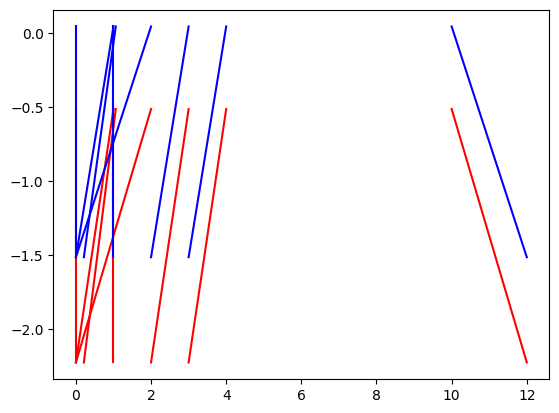

In [134]:
y_pred = LR.predict(X_test)
plt.plot(X_test, y_pred, color ='r')
plt.plot(X_test,y_test,color='b')
plt.show()

In [135]:
#One of the main reasons why the Score is so less while the MAE and MSE are overall a positive indication is because of the standardization that has 
# been applied on the dataset. Secondly the sample size is too less for the dataset to learn and predict well enough
#I did change the the Test size to 20% from 30% in order to get a better accuracy score 
#Most importantly during the time the dataset was standardized I found a lot of values to be outside the [-1,1] range which indicates outliers exist